# Selección de cripto activos para una cartera de inversión

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# ¡Actividades!


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

## Parte I

- Indaguen sobre la existencia de valores faltantes. ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de computarlos (por ejemplo, splines)


- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? 

- Seleccionen un activo y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos.

- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.
## Parte II 

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico. 

- Agreguen la serie de tasas de rendimiento para el precio close de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás. 


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Además, pueden crear indicadores personalizados, que ayudarán a que la predicción sea más precisa. Por ejemplo:


```
# Calculate 3 day moving average of close prices
df['S_3'] = df['close'].shift(1).rolling(window=3).mean()

# Calculate 15 day moving average of close prices
df['S_15'] = df['close'].shift(1).rolling(window=15).mean()

# Calculate 60 day moving average of close prices
df['S_60'] = df['close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
df['Corr'] = df['close'].shift(1).rolling(window=10).corr(df['S_3'].shift(1))

df['Std_U'] = df['high']-df['open']
df['Std_D'] = df['open']-df['low']

df['OD'] = df['open']-df['open'].shift(1)
df['OL'] = df['open']-df['close'].shift(1)
```
entre otros, S_3, S_15 y S_60 corresponde a las medias móviles de 3, 15 y 60 periodos. Además, se calcula la correlación entre los precios de cierre y la media móvil de 3 periodos  

**¿Qué roll cumple la función shift()? ¿Es necesario aplicarla en todos los features que calculamos?**


## Parte III

- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia? ¿Cuál elegirían aplicar?

## Parte IV - Opcional

- Para alguno/s de los activos, detecte las correlaciones entre los features generados utilizando la función Heatmap().




**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 1/7__ 

- __Versión final: 4/7__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Abrir todos los Data Set de criptomonedas y hacer un solo data frame agregando una columna que lo identifica
df=pd.DataFrame()  

#Url donde se encuentran los datos
url = 'https://github.com/charly3d/Diplomatura-de-Datos-Mentoria/blob/main/data/'             

#Listado con los nombres de los criptoactivos que figuran en el url
t = requests.get(url).text                                                                    
criptoactivos = re.findall(r'data/(\w+)\.csv', t)      

#Url Raw para poder levantar los datos
url2='https://raw.githubusercontent.com/charly3d/Diplomatura-de-Datos-Mentoria/main/data/'   

#Por cada cripto activo en la lista crea un dataframe, le agrega una columna con el nombre del cripto y los concatena                                                                          
for c in criptoactivos:                                                                       
  dfcripto=pd.read_csv(url2 + c+'.csv',index_col=0, parse_dates=True, dayfirst= True)
  dfcripto.loc[:,'cripto_activo']=c
  df = pd.concat([df,dfcripto],axis=0)

df_all=df.copy()


In [ ]:
df_all.head()

,open,close,high,low,volume,cripto_activo
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT
2018-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,AAVEUSDT


In [ ]:
df_all.tail()

,open,close,high,low,volume,cripto_activo
2021-05-16 11:00:00,402.23,398.90,404.47,397.26,4005.66944,XMRUSDT
2021-05-16 12:00:00,399.12,393.94,401.34,393.18,3907.98362,XMRUSDT
2021-05-16 13:00:00,393.65,398.16,398.64,391.34,3962.75618,XMRUSDT
2021-05-16 14:00:00,398.03,393.24,399.40,390.54,3418.55213,XMRUSDT
2021-05-16 15:00:00,393.02,390.40,393.19,385.91,2479.33209,XMRUSDT


#**PARTE II -  RESOLUCIÓN**

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico. 

- Agreguen la serie de tasas de rendimiento para el precio close de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás. 


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Además, pueden crear indicadores personalizados, que ayudarán a que la predicción sea más precisa. Por ejemplo:


```
# Calculate 3 day moving average of close prices
df['S_3'] = df['close'].shift(1).rolling(window=3).mean()

# Calculate 15 day moving average of close prices
df['S_15'] = df['close'].shift(1).rolling(window=15).mean()

# Calculate 60 day moving average of close prices
df['S_60'] = df['close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
df['Corr'] = df['close'].shift(1).rolling(window=10).corr(df['S_3'].shift(1))

df['Std_U'] = df['high']-df['open']
df['Std_D'] = df['open']-df['low']

df['OD'] = df['open']-df['open'].shift(1)
df['OL'] = df['open']-df['close'].shift(1)
```
entre otros, S_3, S_15 y S_60 corresponde a las medias móviles de 3, 15 y 60 periodos. Además, se calcula la correlación entre los precios de cierre y la media móvil de 3 periodos  

**¿Qué roll cumple la función shift()? ¿Es necesario aplicarla en todos los features que calculamos?**

##Primer DataFrame

In [ ]:
url = 'https://drive.google.com/file/d/1--1tc9hsqacXfLpyQp5dJacBXV-jAmI7/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
print(path)
df_first=pd.read_csv(path,sep=',', parse_dates=True,header=0,index_col=0)
df_first

https://drive.google.com/uc?export=download&id=1--1tc9hsqacXfLpyQp5dJacBXV-jAmI7


,date,open,close,high,low,volume
cripto_activo,,,,,,
ETCUSDT,2018-06-12 02:00:00,16.2000,15.5300,16.3000,15.3600,22867.560
ETCUSDT,2018-06-12 03:00:00,15.5288,15.2300,16.7999,15.0386,48398.680
ETCUSDT,2018-06-12 04:00:00,15.2300,15.6002,15.7515,15.2000,31377.590
ETCUSDT,2018-06-12 05:00:00,15.6002,16.1502,16.3000,15.6002,50812.820
ETCUSDT,2018-06-12 06:00:00,16.2498,15.6833,16.3000,15.5068,48870.170
...,...,...,...,...,...,...
NEOUSDT,2021-05-16 11:00:00,101.1990,98.8840,101.3750,98.5130,60567.794
NEOUSDT,2021-05-16 12:00:00,98.9110,97.0970,99.6370,96.5650,45624.293
NEOUSDT,2021-05-16 13:00:00,97.0770,98.0900,98.4630,97.0520,30851.648


In [ ]:
df_first.date=pd.to_datetime(df_first.date)
list_group1=df_first.index.unique()


In [ ]:
df_first=df_first.reset_index()
df_first.set_index(['cripto_activo','date'],inplace=True)
df_first

open    close  ...      low     volume
cripto_activo date                                    ...                    
ETCUSDT       2018-06-12 02:00:00   16.2000  15.5300  ...  15.3600  22867.560
              2018-06-12 03:00:00   15.5288  15.2300  ...  15.0386  48398.680
              2018-06-12 04:00:00   15.2300  15.6002  ...  15.2000  31377.590
              2018-06-12 05:00:00   15.6002  16.1502  ...  15.6002  50812.820
              2018-06-12 06:00:00   16.2498  15.6833  ...  15.5068  48870.170
...                                     ...      ...  ...      ...        ...
NEOUSDT       2021-05-16 11:00:00  101.1990  98.8840  ...  98.5130  60567.794
              2021-05-16 12:00:00   98.9110  97.0970  ...  96.5650  45624.293
              2021-05-16 13:00:00   97.0770  98.0900  ...  97.0520  30851.648
              2021-05-16 14:00:00   98.1050  96.5300  ...  96.3500  31804.948
              2021-05-16 15:00:00   96.5300  96.2000  ...  94.7860  28159.743

[226509 rows x 5 columns]

In [ ]:
df=df_first.copy()

####Uso de Shift

La función shift, desplaza los datos sobre la direccion de la filas en la cantidad de lugares que se especifique.

Por ejemplo en :


In [ ]:
prueba=pd.DataFrame(df.loc[list_group1[0]]['close'])
prueba['rolling_mean']=df.loc[list_group1[0],'close'].rolling(window=3).mean()
prueba['close_shift']=df.loc[list_group1[0],'close'].shift(1)
prueba['rolling_mean_with_shift']=df.loc[list_group1[0],'close'].shift(1).rolling(window=3).mean()
prueba

,close,rolling_mean,close_shift,rolling_mean_with_shift
date,,,,
2018-06-12 02:00:00,15.5300,NaN,NaN,NaN
2018-06-12 03:00:00,15.2300,NaN,15.5300,NaN
2018-06-12 04:00:00,15.6002,15.453400,15.2300,NaN
2018-06-12 05:00:00,16.1502,15.660133,15.6002,15.453400
2018-06-12 06:00:00,15.6833,15.811233,16.1502,15.660133
...,...,...,...,...
2021-05-16 11:00:00,100.2130,101.432333,103.0810,101.071000
2021-05-16 12:00:00,97.7040,100.332667,100.2130,101.432333
2021-05-16 13:00:00,98.5330,98.816667,97.7040,100.332667


Vemos que usar shift y rolling mean, hace que el valor que vemos en una fila sea la media movil de los n valores anteriores (en este caso 3), sin incluir al valor de esa fila.

Al no usar shift si lo incluye como ultimo valor para el calculo.

Si queremos usar los indicadores para predecir, lo mejor sería usar la funcion shift, ya que no incluiria en el calculo del Feature al valor en cuestion.  

###Tasas de rendimiento para el precio close de cada activo.

En esta sección vamos a calcular y agregar al data set el rendimiento de los activos, tanto el rendimiento simple como el logarítmico. 


*   **El rendimiento simple:** =(Precio inicial-precio final) / precio inicial
*   **El rendimiento logaritmico:** = ln (Precio inicial / Precio final) =Rc= ln (1+rendimiento simple)

El más recomendado es el logaritmico (https://estrategiastrading.com/rentabilidad-logaritmica/), ya que el rendimiento simple puede caer en calculos donde se puede perder más del 100% de la inversión, el rendimiento logaritmico permite sumar rentabilidades en el tiempo y los porcentajes de ganancia y pérdidas son simétricos.

Igual para valores pequeños, numericamente son muy similares



In [ ]:
#Cálculo de tasas de rendimiento
for cripto in list_group1:
  df.loc[cripto,'rendimiento_simple']=df.loc[cripto,'close'].shift(1).pct_change().values
  df.loc[cripto,'rendimiento_log']=np.log(df.loc[cripto,'close']/df.loc[cripto,'close'].shift(1)).shift(1).values

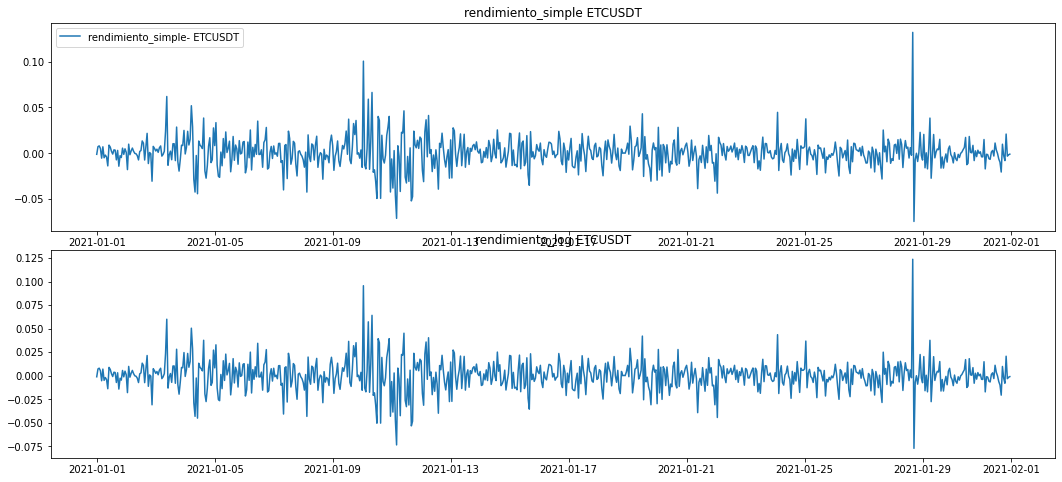

In [ ]:
#Grafico de Tasas de Rendimiento ejemplo
df_gra=df.loc[list_group1[0],'01/2021']
x=df_gra.index

#Rendimiento simple
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.plot(x,df_gra['rendimiento_simple'],label=f'rendimiento_simple- {list_group1[0]}')
plt.title(f'rendimiento_simple {list_group1[0]}')
plt.legend(loc=2)

#Rendimiento Logaritmico
bottom = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
bottom.plot(x, df_gra['rendimiento_log'])
plt.title(f'rendimiento_log {list_group1[0]}')

plt.gcf().set_size_inches(18,8)

### Medias móviles de los precios tomando n periodos hacia atrás. 

En esta sección se van a calcular las medias moviles de los precios, considerando los n periodos anteriores, y mediante el uso de SHIFT, no se considera el valor actual

In [ ]:
periodos=[3,15,60]    #Lista de n periodos hacia atras que nos interesan

for n in periodos:
  for cripto in list_group1:
    df.loc[cripto,f'media_movil_{n}_periodos']=df.loc[cripto,'close'].shift(1).rolling(n).mean().values

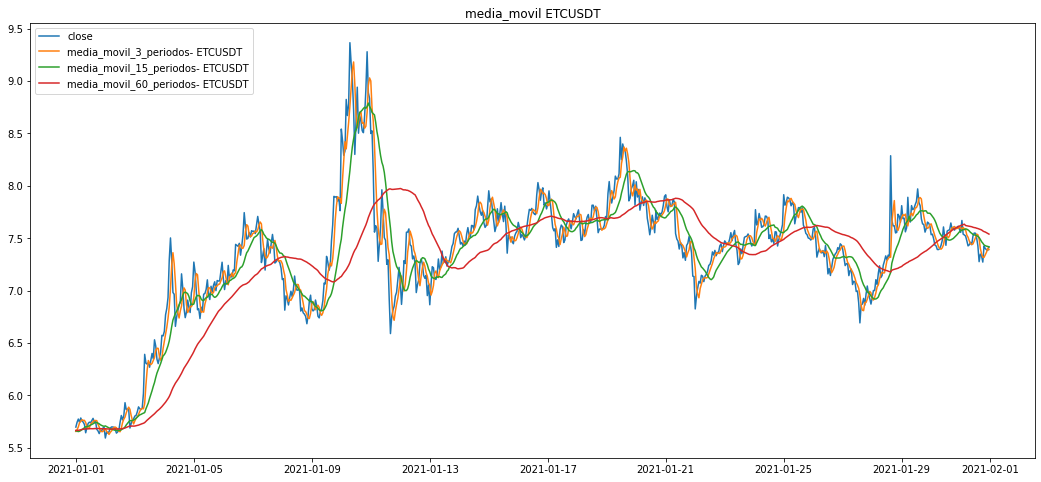

In [ ]:
#Grafico de las distintas medias moviles
df_gra=df.loc[list_group1[0],'01/2021']
x=df_gra.index

plt.plot(x,df_gra['close'],label='close')
plt.plot(x,df_gra['media_movil_3_periodos'],label=f'media_movil_3_periodos- {list_group1[0]}')
plt.plot(x,df_gra['media_movil_15_periodos'],label=f'media_movil_15_periodos- {list_group1[0]}')
plt.plot(x,df_gra['media_movil_60_periodos'],label=f'media_movil_60_periodos- {list_group1[0]}')
plt.title(f'media_movil {list_group1[0]}')
plt.legend(loc=2)

plt.gcf().set_size_inches(18,8)

###- Cálculo de indicadores técnicos


Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html)

####Instalacion TALIB

Talib es una libreria con las funciones para el calculo de muchos de estos indicadores técnicos

In [ ]:
#Instalación e importación de TALIB
#Hay que correrlo cada vez que se reinicia el entorno de ejecucion
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3


import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3789    0  3789    0     0  44058      0 --:--:-- --:--:-- --:--:-- 43551
100  503k  100  503k    0     0  2206k      0 --:--:-- --:--:-- --:--:-- 2206k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3797    0  3797    0     0  54242      0 --:--:-- --:--:-- --:--:-- 54242
100  406k  100  406k    0     0  1545k      0 --:--:-- --:--:-- --:--:-- 1545k


In [ ]:
#Otra forma de instalar Talib pero que lleva más tiempo
  #Hay que correrlo cada vez que se reinicia el entorno de ejecucion

#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
#!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd ta-lib
#!./configure --prefix=/usr
#!make
#!make install
#!pip install Ta-Lib

#import talib

####Calculo de RSI (Relative Strength Index)

El indicado de fuerza relativa o Relative Strength Index (RSI), se calcula de la siguiente manera:

RSI = 100 – 100 / ( 1 + RS )

RS = Relative Strength = AvgU / AvgD

AvgU = Promedio de todos las ganancias en los ultimos n periodos

AvgD = Promedio de todos las perdidas en los ultimos n periodos

n = el periodo del RSI

para el cálculo del promedio de las gananacias y las perdidas se suele usar un simple promedio movil, un promedio exponencial movil o Wilder’s Smoothing Method (es parecido al exponencial solo cambia el factor de suavizado).

Al ver la definición de RSI, se observa que sus valores pueden ir de 0, cuando RS vale 0, es decir no hubo ganancias en los ultimos n periodos y 100, cuando no hubo perdidas en los ultimos periodos


**Interpretación :**

los valores altos de RSI son una señal de mercado alcista (que puede estar sobrecomprado, dependiendo de la visión particular y estilo de negociación).

Por el contrario, un RSI bajo significa que el RS también está bajo y los movimientos bajistas recientes han sido mucho mayores que los movimientos alcistas recientes, en otras palabras, mercado bajista (y posiblemente sobrevendido).

Un valor de RSI superior a 80 o 90 se considera sobrecompra.

El valor de RSI por debajo de 20 o 10 se considera sobreventa.

A continuación se desarrolla una función para el calculo de RSI

In [ ]:
#Funcion para el calculo de RSI
def RSI(df,columna='close',n=3):
  #cálculo de la diferencia
  diferencia=df[columna].diff().shift() #El shift es por lo que se explico en la seccion Uso de Shift

  #Obtención de las perdidas
  perdida_D=-diferencia.mask(diferencia > 0, 0.0) #Solo guarda los valores menores a 0, el resto los iguala a 0

  #Obtención de las Ganancias
  ganancia_U=diferencia.mask(diferencia < 0, 0.0) #Solo guarda los valores mayores a 0, el resto los iguala a 0

  #Promedios exponenciales de los n periodos (ewm)
  AvgU=ganancia_U.ewm(com=n).mean()
  AvgD=perdida_D.ewm(com=n,).mean()

  #calculo de RS
  rs=AvgU/AvgD
  rs.iloc[:n]=np.nan  #Pone nan en los primeros n valores porque suelen ser erroneos
  
  #Calculo de RSI
  RSI= 100 - (100/(1 + rs))
  return RSI

Se realiza el cálculo de RSI teniendo en cuenta los ultimos 100 periodos

In [ ]:
#Calculo de RSI para cada Activo con un n de 100
for cripto in list_group1:
  n=100
  df.loc[cripto,f'RSI_{n}']=RSI(df.loc[cripto],n=n).values

Grafica de ejemplo del RSI

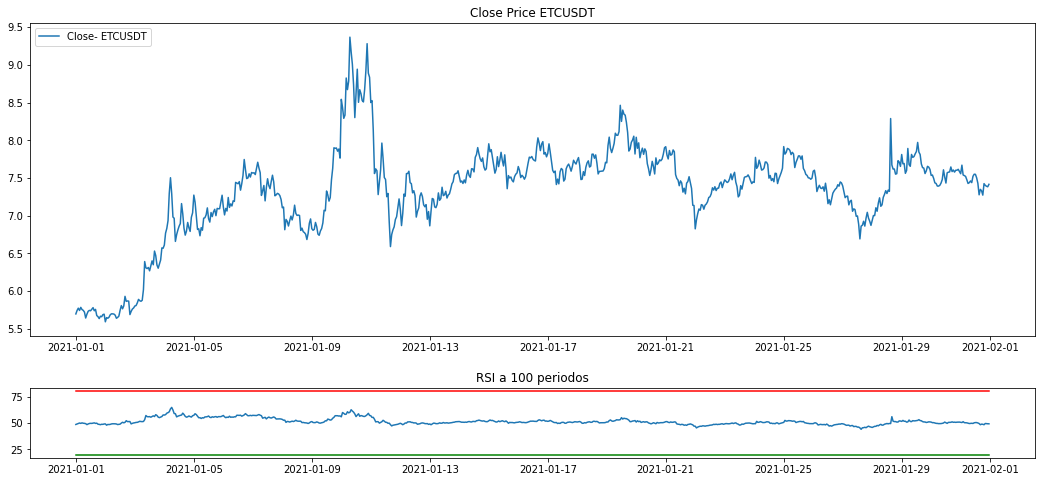

In [ ]:
df_gra=df.loc[list_group1[0],'01/2021']

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df_gra.index,
         df_gra['close'], label=f'Close- {list_group1[0]}')

plt.title(f'Close Price {list_group1[0]}')
plt.legend(loc=2)

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.plot(df_gra.index, df_gra['RSI_100'])
bottom.plot(df_gra.index,np.ones(len(df_gra.index)) * 20,color='g')
bottom.plot(df_gra.index,np.ones(len(df_gra.index)) * 80,color='r')
plt.title('RSI a 100 periodos')
plt.gcf().set_size_inches(18,8)
plt.subplots_adjust(hspace=0.75)

A continuación se usa Talib para el cálculo con otros periodos

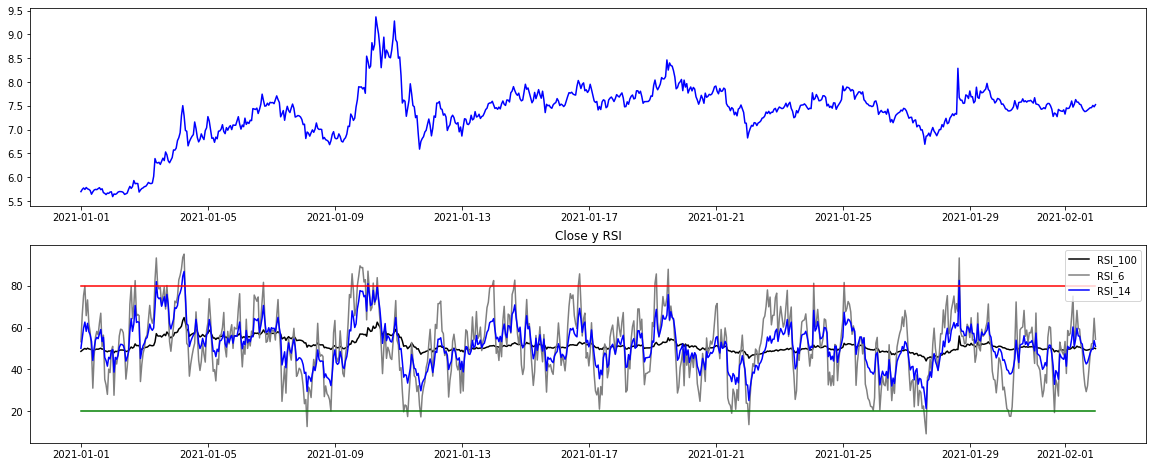

In [ ]:
for cripto in list_group1:
  df.loc[cripto,'RSI_14'] = talib.RSI(df.loc[cripto]['close'].shift(1).values, timeperiod=14)
  df.loc[cripto,'RSI_6'] = talib.RSI(df.loc[cripto]['close'].shift(1).values, timeperiod=6)
  df.loc[cripto,'RSI_100'] = talib.RSI(df.loc[cripto]['close'].shift(1).values, timeperiod=100)

  #print("rsi6={0:.1f} , rsi14={1:.1f}".format(df.loc[cripto,'RSI_6'][-1], df.loc[cripto,'RSI_100talib'][-1]))

#Plot:
df_gra=df.loc[list_group1[0]].loc['01/01/2021':'02/01/2021']

fig,ax=plt.subplots(2,1,figsize=(20, 8))
ax[0].plot(df_gra['close'], color='blue',label='Close')
ax[1].plot(df_gra['RSI_100'], color='black', label='RSI_100')
ax[1].plot(df_gra['RSI_6'], color='gray', label='RSI_6')
ax[1].plot(df_gra['RSI_14'], color='blue', label='RSI_14')
ax[1].plot(df_gra.index,np.ones(len(df_gra.index)) * 20,color='g')
ax[1].plot(df_gra.index,np.ones(len(df_gra.index)) * 80,color='r')
plt.legend(loc='best')
plt.title('Close y RSI')
plt.show()

####Calculo de MADC
Son las siglas de Media Móvil de Convergencia/Divergencia o Moving Average Convergence/Divergence en inglés.

Este indicador es un seguidor de tendencia, un indicador de momentum que captura la tendencia y muestra la relación entre dos medias móviles de los precios. 

El MACD es un indicador retardado, y es también uno de los mejores indicadores seguidores de tendencia que ha resistido la prueba del tiempo. Además, permite una gran versatilidad en trading.

MACD es la convergencia y divergencia en el tiempo de dos medias móviles del precio de un activo. En otras palabras el MACD señala, en cada momento, la separación entre el valor de dos medias móviles con diferente período de cálculo.

Una vez que se obtienen dichas medias móviles, el MACD se calcula restándole al valor de la media de 12 períodos el valor de la media de 26 períodos:

MACD = EMA (12) – EMA (26)

Después de obtener el MACD, se calcula, a su vez, su media móvil exponencial. Para realizar este cálculo se suele emplear una media de 9 períodos. Esta media móvil se denomina Señal.

El MACD y la Señal se representarán de manera gráfica mediante dos líneas.

Por último, para utilizar el indicador, además de las dos gráficas calculadas, MACD y Señal, se representa también mediante un gráfico de barras, o histograma, la diferencia de valor en cada momento entre el MACD y la Señal.


El indicador MACD se compone de los siguientes elementos:

* Media móvil exponencial (EMA) de 26 períodos
* EMA de 12 períodos
* Línea de señal del MACD: media móvil simple
* Histograma del MACD

¿Cómo calcular el MACD? La fórmula del MACD es la siguiente:

* Valor MACD = (EMA 12 períodos - EMA 26 períodos)
* Señal = SMA 9 del cálculo anterior
* Histograma MACD = (valor MACD - línea de señal)

**Interpretación **

Las señales de trading que proporciona el MACD se obtienen analizando los cruces entre las líneas MACD y Señal.

Los cruces entre las líneas MACD y Señal darán señales alcistas o bajistas sobre el sentido de la evolución del precio en función de lo siguiente:

*   Cuando el cruce de la línea MACD con la línea Señal se produzca de abajo a arriba, la señal será alcista.
*   Cuando el cruce de la línea MACD con la línea Señal se produzca 

Una práctica habitual para confirmar la señal aportada por el cruce de las líneas del MACD es esperar a que el histograma confirme el movimiento. Esta confirmación vendrá determinada por la rapidez y amplitud del movimiento del histograma:

En un cruce alcista, si el histograma crece rápidamente de valor, se estará confirmando la fortaleza del movimiento en el precio.

En caso contrario, si el cruce es bajista se buscará que el histograma disminuya rápidamente de valor.

Para confirmar las señales aportadas por el MACD, también es muy recomendable el uso conjunto del MACD con otro indicador técnico. En este sentido, uno de los indicadores que se suelen emplear junto con el MACD es el RSI:

Uso combinado del MACD y el RSI.
Un aumento del RSI es indicativo de la fortaleza de un movimiento de la cotización, mientras que una disminución de su valor indicaría lo contrario.

Por sus características, es fácil entender que se trata de un indicador que combina muy bien con el MACD.

Fuente: https://www.avatrade.es/educacion/professional-trading-strategies/macd-trading-strategies

In [ ]:
#Usando TALIB para el calculo

for cripto in list_group1:
  macd, signal, hist = talib.MACD(df.loc[cripto]['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
  df.loc[cripto,'MACD'] = macd
  df.loc[cripto,'signal'] = signal
  df.loc[cripto,'hist'] = hist

Text(0.5, 1.0, 'volumen')

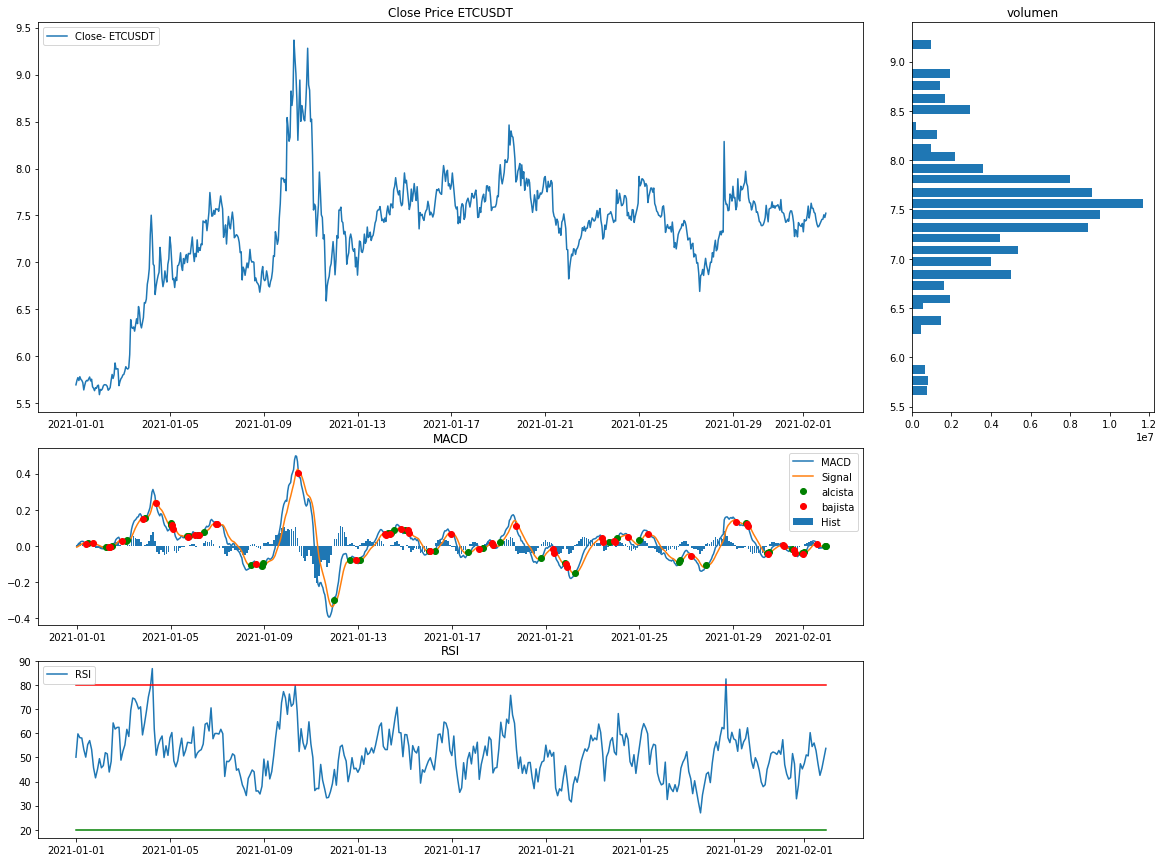

In [ ]:
#Grafico
dfaux=df.loc[list_group1[0]].loc['01/01/2021':'02/01/2021']
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=3)
top.plot(dfaux.index,dfaux['close'],label=f'Close- {list_group1[0]}')
plt.title(f'Close Price {list_group1[0]}')
plt.legend(loc=2)


#Grafico MACD
MACDplot = plt.subplot2grid((4,4), (2,0), rowspan=1, colspan=3)
MACDplot.plot(dfaux.index, dfaux['MACD'],label='MACD')
MACDplot.plot(dfaux.index, dfaux['signal'],label='Signal')

#cruces entre las curvas
cruces_alcista=(dfaux['MACD']>=dfaux['signal'].shift()) & (dfaux['MACD'].shift(1)<=dfaux['signal'])
cruces_bajistas=(dfaux['MACD']<=dfaux['signal'].shift()) & (dfaux['MACD'].shift(1)>=dfaux['signal'])
puntoscruce_alcista=dfaux['MACD'][cruces_alcista]
puntoscruce_bajista=dfaux['MACD'][cruces_bajistas]


plt.title('MACD')
MACDplot.plot(puntoscruce_alcista, marker="o", color="green",linewidth=0,label='alcista')
MACDplot.plot(puntoscruce_bajista, marker="o", color="red",linewidth=0,label='bajista')
dfaux=dfaux.asfreq('2h')
MACDplot.bar(dfaux.index, dfaux['hist'],label='Hist',width=0.07)
plt.legend(loc='best')


#Grafico RSI
rsiplot= plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=3)
rsiplot.plot(dfaux.index, dfaux['RSI_14'],label='RSI')
rsiplot.plot(dfaux.index,np.ones(len(dfaux.index)) * 20,color='g')
rsiplot.plot(dfaux.index,np.ones(len(dfaux.index)) * 80,color='r')
plt.title('RSI')

plt.gcf().set_size_inches(20,15)
#plt.subplots_adjust(hspace=0.75)
plt.legend(loc=2)

#grafico de volumen

volumenplot=plt.subplot2grid((4,4), (0,3), rowspan=2, colspan=1)

bins=30

dfaux['close_discreto']=pd.cut(dfaux['close'],bins,include_lowest=True)
precio=dfaux.groupby(by='close_discreto').mean()['close']
volumen=dfaux.groupby(by='close_discreto').sum()['volume']
h=precio.max()-precio.min()/bins
volumenplot.barh(precio,volumen,height=h/100,label='volumen')

plt.title('volumen')


En el grafico anterior se observa la variable close en el periodo del 08 de Enero al 14 de Enero del 2021 del Activo **ETCUSDT**, por debajo se observa el indice** MACD** y **signal**, tambien se marcaron con rojo los puntos en donde el cruce de MACD y Signal es de arriba para abajo (prevision bajista), y en verde el cruce de MACD y signal de abajo hacia arriba (previsión alcista)

Se observa por ejemplo que el 10 de enero aproximadamente se dio un cruce de arriba hacia abajo, junto con un valor elevado de RSI, por lo que se podia suponer que iba a comenzar periodo de bajista y así fue. Como este ejemplo hay varios otros.

####Calculo de ADX 

indicador ADX – Average Directional Index o Movimiento Direccional Promedio
https://estrategiastrading.com/indicador-adx-formula/

El ADX mide la fuerza (o la falta de fuerza) del movimiento direccional alcista o bajista.
El ADX es no direccional – no indica la dirección de la tendencia- sólo indica la fuerza que tiene dicho movimiento.
Puedes tomar el ADX como un conjunto de indicadores.
Uno te indica si el movimiento es alcista, otro si es bajista, otro la fuerza del movimiento y otro la diferencia que existe entre alcista y bajista.
El cálculo del movimiento direccional toma en cuenta principalmente los máximos y los mínimos. Sólo toma en cuenta el cierre de la vela para el cálculo del rango verdadero.

Es importante la interpolación realizada en la primera parte, ya que sin esa interpolación el calculo de ADX con TALIB daba 98% de Datos NAN

In [ ]:
#Usando TALIB
for cripto in list_group1:

  df.loc[cripto,'ADX'] = talib.ADX(df.loc[cripto,'high'].values, df.loc[cripto,'low'].values, df.loc[cripto,'close'].values, timeperiod=3)

df.isna().mean()


open                       0.000000
close                      0.000000
high                       0.000000
low                        0.000000
volume                     0.000000
rendimiento_simple         0.000071
rendimiento_log            0.000071
media_movil_3_periodos     0.000106
media_movil_15_periodos    0.000530
media_movil_60_periodos    0.002119
RSI_100                    0.003567
RSI_14                     0.000530
RSI_6                      0.000247
MACD                       0.001166
signal                     0.001166
hist                       0.001166
ADX                        0.000177
dtype: float64

Función de calculo ADX Y ATR (Average true range)

In [ ]:

def ADX(data: pd.DataFrame, period: int):
    df_aux = data.copy()
    alpha = 1/period

    # TR (True Range), calculo del rango verdadero
    df_aux['H-L'] = df_aux['high'].shift(1) - df_aux['low'].shift(1)
    df_aux['H-C'] = np.abs(df_aux['high'].shift(1) - df_aux['close'].shift(2))
    df_aux['L-C'] = np.abs(df_aux['low'].shift(1) - df_aux['close'].shift(2))
    df_aux['TR'] = df_aux[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df_aux['H-L'], df_aux['H-C'], df_aux['L-C']

    # ATR (Average True Range), promedio ponderado del TR
    df_aux['ATR'] = df_aux['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX (Indicador direccional)
    df_aux['H-pH'] = df_aux['high'].shift(1) - df_aux['high'].shift(2)
    df_aux['pL-L'] = df_aux['low'].shift(2) - df_aux['low'].shift(1)
    df_aux['+DX'] = np.where(
        (df_aux['H-pH'] > df_aux['pL-L']) & (df_aux['H-pH']>0),
        df_aux['H-pH'],
        0.0
    )
    df_aux['-DX'] = np.where(
        (df_aux['H-pH'] < df_aux['pL-L']) & (df_aux['pL-L']>0),
        df_aux['pL-L'],
        0.0
    )
    del df_aux['H-pH'], df_aux['pL-L']

    # +- DMI (Indice de movimiento direccional_ Directional Movement Index)
    df_aux['S+DM'] = df_aux['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df_aux['S-DM'] = df_aux['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df_aux['+DMI'] = (df_aux['S+DM']/df_aux['ATR'])*100
    df_aux['-DMI'] = (df_aux['S-DM']/df_aux['ATR'])*100
    del df_aux['S+DM'], df_aux['S-DM']

    # ADX (Average Directional Movement Index)
    df_aux['DX'] = (np.abs(df_aux['+DMI'] - df_aux['-DMI'])/(df_aux['+DMI'] + df_aux['-DMI']))*100
    df_aux['ADX'] =df_aux['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df_aux['DX'], df_aux['TR'], df_aux['-DX'], df_aux['+DX'], df_aux['+DMI'], df_aux['-DMI']

    return df_aux

fuente: https://estrategiastrading.com/indicador-adx-formula/

#####Cálculo con función ADX Y ATR

In [ ]:
for cripto in list_group1:
  df.loc[cripto,'ATR']=ADX(df.loc[cripto], period=14)['ATR'].values
  df.loc[cripto,'ADX']=ADX(df.loc[cripto], period=14)['ADX'].values

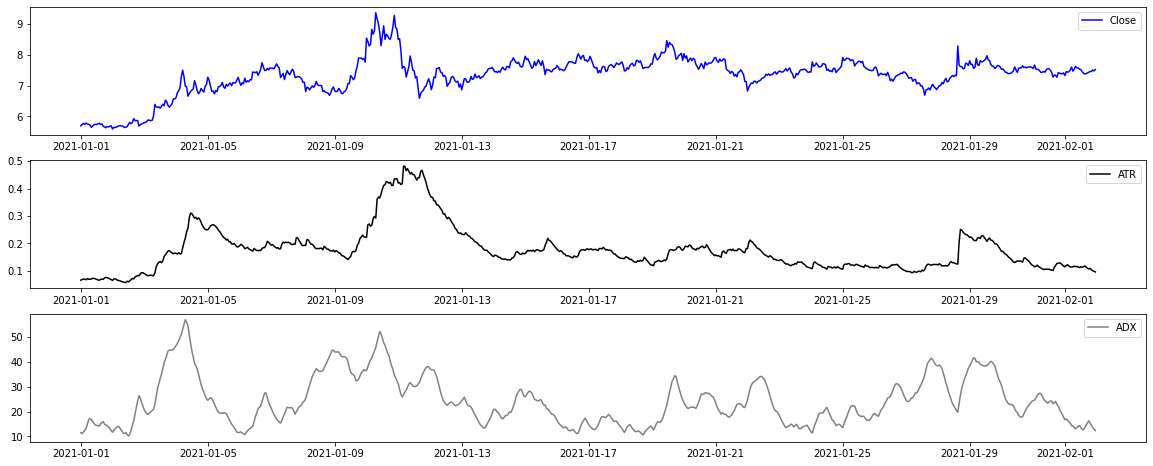

In [ ]:
#Plot:
df_gra=df.loc[list_group1[0]].loc['01/01/2021':'02/01/2021']

fig,ax=plt.subplots(3,1,figsize=(20, 8))

ax[0].plot(df_gra['close'], color='blue',label='Close')
ax[0].legend(loc='best')
ax[1].plot(df_gra['ATR'], color='black', label='ATR')
ax[1].legend(loc='best')
ax[2].plot(df_gra['ADX'], color='gray', label='ADX')

plt.legend(loc='best')

plt.show()

####Otros features

Volatilidad: Media movil de los rendimientos

In [ ]:
for cripto in list_group1:
  df.loc[cripto,'Volatilidad_50_periodos']=df.loc[cripto,'rendimiento_log'].rolling(50).std().values

Std_U: Diferencias entre el precio maximo y el de apertura

Std_D: Diferencias entre el precio de apertura y el más bajo

In [ ]:
df['Std_U'] = df['high'].shift(1)-df['open'].shift(1)
df['Std_D'] = df['open'].shift(1)-df['low'].shift(1)

Correlación entre el valor de precio de cierre y la media movil 

In [ ]:
for cripto in list_group1:
  df.loc[cripto,'Corr_3_periodos'] = df.loc[cripto,'close'].shift(1).rolling(window=10).corr(df['media_movil_3_periodos'].shift(1))

Diferencia de precios de apertura con un periodo anterior y diferencia del precio de apertura con respecto al precio de cierre anterior

In [ ]:
for cripto in list_group1:
  df.loc[cripto,'OD'] = df.loc[cripto]['open'].values-df.loc[cripto]['open'].shift(1).values
  df.loc[cripto,'OL'] = df.loc[cripto]['open'].values-df.loc[cripto]['close'].shift(1).values

MFI https://admiralmarkets.com/es/education/articles/forex-indicators/indicador-mfi

El Money Flow Index oscila entre los niveles 0 y 100. Un uso básico del índice de flujo de dinero es indicar cuándo el mercado está sobrecomprado o sobrevendido.

Mercado en sobreventa: valores inferiores a 20
Mercado en sobrecompra: niveles superiores a 80

In [ ]:
for cripto in list_group1:
    df.loc[cripto,'MFI'] = talib.MFI(df.loc[cripto,'high'].shift(1).values, 
                                     df.loc[cripto,'low'].shift(1).values, 
                                     df.loc[cripto,'close'].shift(1).values , 
                                     df.loc[cripto,'volume'].shift(1).values, 
                                     timeperiod=14)


OBV (On Balance Volume)  https://www.investopedia.com/articles/technical/100801.asp

La teoría postula que cuando el volumen aumenta o disminuye drásticamente, sin un cambio significativo en el precio de una emisión, en algún momento el precio "salta" hacia arriba o hacia abajo.

In [ ]:
for cripto in list_group1:
    df.loc[cripto,'OBV'] = talib.OBV( df.loc[cripto,'close'].shift(1).values , 
                                     df.loc[cripto,'volume'].shift(1).values)


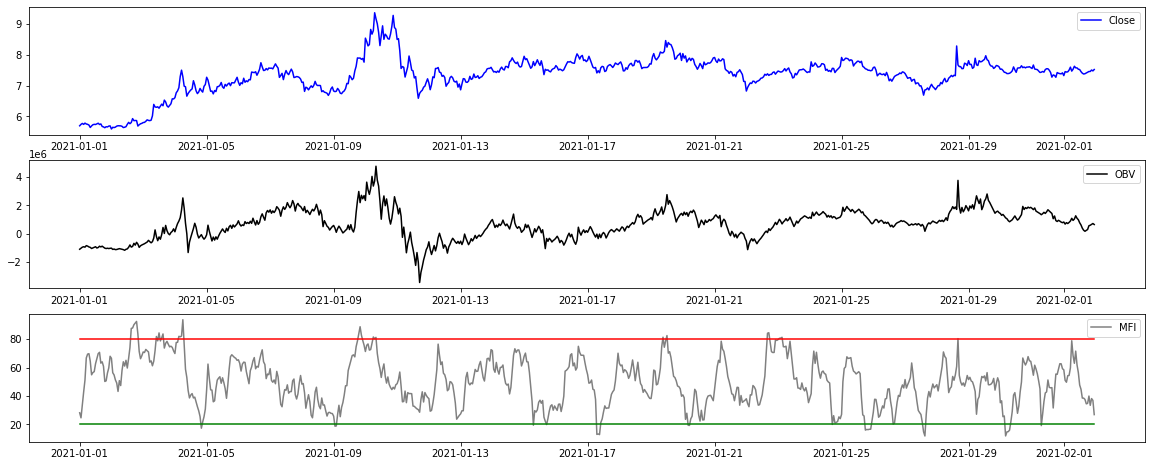

In [ ]:
#Plot:
df_gra=df.loc[list_group1[0]].loc['01/01/2021':'02/01/2021']

fig,ax=plt.subplots(3,1,figsize=(20, 8))

ax[0].plot(df_gra['close'], color='blue',label='Close')
ax[0].legend(loc='best')
ax[1].plot(df_gra['OBV'], color='black', label='OBV')
ax[1].legend(loc='best')
ax[2].plot(df_gra['MFI'], color='gray', label='MFI')
ax[2].plot(df_gra.index,np.ones(len(df_gra.index)) * 20,color='g')
ax[2].plot(df_gra.index,np.ones(len(df_gra.index)) * 80,color='r')
plt.legend(loc='best')

plt.show()

In [ ]:
df.isna().mean()

open                       0.000000
close                      0.000000
high                       0.000000
low                        0.000000
volume                     0.000000
rendimiento_simple         0.000071
rendimiento_log            0.000071
media_movil_3_periodos     0.000106
media_movil_15_periodos    0.000530
media_movil_60_periodos    0.002119
RSI_100                    0.003567
RSI_14                     0.000530
RSI_6                      0.000247
MACD                       0.001166
signal                     0.001166
hist                       0.001166
ADX                        0.000084
ATR                        0.000035
Volatilidad_50_periodos    0.001801
Std_U                      0.000004
Std_D                      0.000004
Corr_3_periodos            0.000459
OD                         0.000035
OL                         0.000035
MFI                        0.000530
OBV                        0.000035
dtype: float64

Se han generado muchos nan al trabajar con los indicadores, esto es debido a que necesitan cierta cantidad de valores para poder calcularlos. igual los NAN no superan el 0,4% de las datos, podrian limpiarse

##Segundo DataFrame

In [ ]:
url = 'https://drive.google.com/file/d/1-3LRysHjRCC00BmAeDCVPFNP-CKaCLLr/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
print(path)
df_second= pd.read_csv(path,sep=',', parse_dates=True,header=0,index_col=0)
list_group2=df_second.index.unique()

https://drive.google.com/uc?export=download&id=1-3LRysHjRCC00BmAeDCVPFNP-CKaCLLr


In [ ]:
df_second

,date,open,close,high,low,volume
cripto_activo,,,,,,
AAVEUSDT,2020-10-15 03:00:00,51.430,47.099,59.000,46.437,13042.026
AAVEUSDT,2020-10-15 04:00:00,47.097,47.486,47.916,46.158,4565.137
AAVEUSDT,2020-10-15 05:00:00,47.429,49.000,49.746,47.428,5618.395
AAVEUSDT,2020-10-15 06:00:00,49.000,49.031,49.496,48.610,1977.936
AAVEUSDT,2020-10-15 07:00:00,49.150,49.000,49.208,48.610,3338.552
...,...,...,...,...,...,...
LINKUSDT,2021-05-16 11:00:00,44.399,43.647,44.634,43.600,171286.862
LINKUSDT,2021-05-16 12:00:00,43.663,43.021,43.896,42.973,245096.335
LINKUSDT,2021-05-16 13:00:00,43.024,43.165,43.267,42.801,277337.619


In [ ]:
df_second=df_second.reset_index()
df_second.set_index(['cripto_activo','date'],inplace=True)
df_second

open   close    high     low      volume
cripto_activo date                                                           
AAVEUSDT      2020-10-15 03:00:00  51.430  47.099  59.000  46.437   13042.026
              2020-10-15 04:00:00  47.097  47.486  47.916  46.158    4565.137
              2020-10-15 05:00:00  47.429  49.000  49.746  47.428    5618.395
              2020-10-15 06:00:00  49.000  49.031  49.496  48.610    1977.936
              2020-10-15 07:00:00  49.150  49.000  49.208  48.610    3338.552
...                                   ...     ...     ...     ...         ...
LINKUSDT      2021-05-16 11:00:00  44.399  43.647  44.634  43.600  171286.862
              2021-05-16 12:00:00  43.663  43.021  43.896  42.973  245096.335
              2021-05-16 13:00:00  43.024  43.165  43.267  42.801  277337.619
              2021-05-16 14:00:00  43.166  42.440  43.343  42.183  312785.507
              2021-05-16 15:00:00  42.431  42.198  42.512  41.534  275260.108

[97614 rows x 5 columns]

In [ ]:
df2=df_second.copy()

####Redimientos

In [ ]:
for cripto in list_group2:
  df2.loc[cripto,'rendimiento_simple']=df2.loc[cripto,'close'].shift(1).pct_change().values
  df2.loc[cripto,'rendimiento_log']=np.log(df2.loc[cripto,'close']/df2.loc[cripto,'close'].shift(1)).shift(1).values

####Medias Moviles

In [ ]:
periodos=[3,15,60]
for n in periodos:
  for cripto in list_group2:
    df2.loc[cripto,f'media_movil_{n}_periodos']=df2.loc[cripto,'close'].shift(1).rolling(n).mean().values

####RSI

In [ ]:
for cripto in list_group2:
  df2.loc[cripto,'RSI_14'] = talib.RSI(df2.loc[cripto]['close'].shift(1).values, timeperiod=14)
  df2.loc[cripto,'RSI_6'] = talib.RSI(df2.loc[cripto]['close'].shift(1).values, timeperiod=6)
  df2.loc[cripto,'RSI_100'] = talib.RSI(df2.loc[cripto]['close'].shift(1).values, timeperiod=100)

####MACD

In [ ]:
#Usando TALIB para el calculo

for cripto in list_group2:
  macd, signal, hist = talib.MACD(df2.loc[cripto]['close'].shift(1).values, fastperiod=12, slowperiod=26, signalperiod=9)
  df2.loc[cripto,'MACD'] = macd
  df2.loc[cripto,'signal'] = signal
  df2.loc[cripto,'hist'] = hist

####ADX Y ATR

In [ ]:
for cripto in list_group2:

  df2.loc[cripto,'ADX']=ADX(df2.loc[cripto], period=14)['ADX'].values
  df2.loc[cripto,'ATR']=ADX(df2.loc[cripto], period=14)['ATR'].values


MFI

In [ ]:
for cripto in list_group2:
    df2.loc[cripto,'MFI'] = talib.MFI(df2.loc[cripto,'high'].shift(1).values, 
                                     df2.loc[cripto,'low'].shift(1).values, 
                                     df2.loc[cripto,'close'].shift(1).values , 
                                     df2.loc[cripto,'volume'].shift(1).values, 
                                     timeperiod=14)

OBV (On Balance Volume) https://www.investopedia.com/articles/technical/100801.asp

In [ ]:
for cripto in list_group2:
    df2.loc[cripto,'OBV'] = talib.OBV( df2.loc[cripto,'close'].shift(1).values , 
                                     df2.loc[cripto,'volume'].shift(1).values)


####Otras Features

In [ ]:
for cripto in list_group2:
  df2.loc[cripto,'Volatilidad_50_periodos']=df2.loc[cripto,'rendimiento_log'].rolling(50).std().values

In [ ]:
df2['Std_U'] = df2['high'].shift(1)-df2['open'].shift(1)
df2['Std_D'] = df2['open'].shift(1)-df2['low'].shift(1)

In [ ]:
for cripto in list_group2:
  df2.loc[cripto,'Corr_3_periodos'] = df2.loc[cripto,'close'].shift(1).rolling(window=10).corr(df2['media_movil_3_periodos'].shift(1))

In [ ]:
for cripto in list_group2:
  df2.loc[cripto,'OD'] = df2.loc[cripto]['open'].values-df2.loc[cripto]['open'].shift(1).values
  df2.loc[cripto,'OL'] = df2.loc[cripto]['open'].values-df2.loc[cripto]['close'].shift(1).values

#**PARTE III -  RESOLUCIÓN**



- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia? ¿Cuál elegirían aplicar?

Se deberia llevar a cabo un **escalado o una estandarización** de los datos ( lo que dejaria a todas las caracteristicas en el mismo orden de magnitud, un escalado, por ejemplo **min_max scaler**, dejaria a todas las variables con el **mismo rango, entre 0 y 1**, pero una variable con outliers muy grandes podria generar una distribucion escalada con varianzas muy pequeñas, frente a una caracterisca sin outliers, en donde su varianza seria mayor.

Una **estandarizacion** (o **standard scaler**) escala los datos y los desplaza para dejarlos con una m**edia de 0 y una varianza de 1**, este escalado es preferible para metodos como PCA donde se busca la componente que influeye más en la varianza).

En nuestro caso tenemos una variable Volume y variables de precio con mucha diferencia de magnitud, con la variable volume que tiene outliers más importantes que el precio, pero las variables de precio de algunas monedas tienen rangos muy grandes a lo largo del tiempo, **lo mejor seria realizar un *estandarizado* .**

Por otra parte a veces se llama normalizado al estandarizado, ya que se le da a la distribucion las principales caractiristicas de una distribucion normal estandar, media=0 y desvio=1, pero tambien se llama normalizado a la tarea de darle a todos los vectores una norma de igual a 1.

**No creemos que un normalizado** desde el punto de darle a los vectores una norma de 1 sea lo que deberiamos aplicar.

Implementación standarizado

##Primer DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scal=df.copy()
scaler=StandardScaler(with_mean=True)
for cripto in list_group1:
  matriz_std=scaler.fit_transform(df.loc[cripto])
  columnas=df.loc[cripto].columns
  df_scal.loc[cripto]=matriz_std
df_scal.head(3)

open     close  ...  MFI       OBV
cripto_activo date                                     ...               
ETCUSDT       2018-06-12 02:00:00  0.601800  0.543571  ...  NaN       NaN
              2018-06-12 03:00:00  0.544451  0.517969  ...  NaN -0.375225
              2018-06-12 04:00:00  0.518920  0.549562  ...  NaN -0.381443

[3 rows x 26 columns]

In [ ]:
df_scal.loc[cripto].describe().round(2)

,open,close,high,low,volume,rendimiento_simple,rendimiento_log,media_movil_3_periodos,media_movil_15_periodos,media_movil_60_periodos,RSI_100,RSI_14,RSI_6,MACD,signal,hist,ADX,ATR,Volatilidad_50_periodos,Std_U,Std_D,Corr_3_periodos,OD,OL,MFI,OBV
count,29560.00,29560.00,29560.00,29560.00,29560.00,29558.00,29558.00,29557.00,29545.00,29500.00,29459.00,29545.00,29553.00,29527.00,29527.00,29527.00,29557.00,29559.00,29509.00,29560.00,29560.00,29547.00,29559.00,29559.00,29545.00,29559.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.74,-0.74,-0.72,-0.76,-8.14,-13.01,-14.42,-0.72,-0.72,-0.71,-4.67,-3.90,-2.86,-14.21,-12.95,-19.81,-1.84,-0.43,-1.35,-0.89,-28.92,-3.50,-31.01,-43.52,-11.25,-1.47
25%,-0.58,-0.57,-0.57,-0.58,-0.49,-0.40,-0.40,-0.57,-0.57,-0.57,-0.61,-0.65,-0.70,-0.11,-0.11,-0.10,-0.76,-0.38,-0.65,-0.21,-0.22,-0.69,-0.09,0.03,-0.72,-0.65
50%,-0.42,-0.42,-0.42,-0.42,-0.28,-0.01,-0.01,-0.42,-0.42,-0.41,0.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.20,-0.32,-0.25,-0.18,-0.18,0.14,-0.00,0.03,0.01,-0.34
75%,0.06,0.06,0.06,0.06,0.12,0.39,0.39,0.06,0.06,0.04,0.63,0.66,0.71,0.10,0.10,0.11,0.56,-0.07,0.37,-0.07,-0.05,0.85,0.09,0.03,0.72,0.32
max,5.26,5.23,5.42,5.19,26.78,20.31,17.91,5.17,4.93,4.26,4.97,3.86,2.82,14.98,14.15,19.80,6.82,18.25,9.91,39.01,24.92,1.65,28.90,0.98,26.07,4.46


##Segundo DataFrame

In [ ]:
df2.isna().sum()

open                         0
close                        0
high                         0
low                          0
volume                       0
rendimiento_simple          16
rendimiento_log             16
media_movil_3_periodos      24
media_movil_15_periodos    120
media_movil_60_periodos    480
RSI_14                     120
RSI_6                       56
RSI_100                    808
MACD                       272
signal                     272
hist                       272
ADX                         23
ATR                          8
MFI                        120
OBV                          8
Volatilidad_50_periodos    408
Std_U                        1
Std_D                        1
Corr_3_periodos            104
OD                           8
OL                           8
dtype: int64

In [ ]:
(~np.isfinite(df2)).sum()-(np.isnan(df2)).sum()

open                       0
close                      0
high                       0
low                        0
volume                     0
rendimiento_simple         0
rendimiento_log            0
media_movil_3_periodos     0
media_movil_15_periodos    0
media_movil_60_periodos    0
RSI_14                     0
RSI_6                      0
RSI_100                    0
MACD                       0
signal                     0
hist                       0
ADX                        0
ATR                        0
MFI                        0
OBV                        0
Volatilidad_50_periodos    0
Std_U                      0
Std_D                      0
Corr_3_periodos            1
OD                         0
OL                         0
dtype: int64

Por alguna razon hay un valor infinito en la columna correlacion, lo vamos a reemplazar por nan

In [ ]:
df2_sin_infi=df2.replace([np.inf, -np.inf], np.nan)


In [ ]:
(~np.isfinite(df2_sin_infi)).sum()-(np.isnan(df2_sin_infi)).sum()

open                       0
close                      0
high                       0
low                        0
volume                     0
rendimiento_simple         0
rendimiento_log            0
media_movil_3_periodos     0
media_movil_15_periodos    0
media_movil_60_periodos    0
RSI_14                     0
RSI_6                      0
RSI_100                    0
MACD                       0
signal                     0
hist                       0
ADX                        0
ATR                        0
MFI                        0
OBV                        0
Volatilidad_50_periodos    0
Std_U                      0
Std_D                      0
Corr_3_periodos            0
OD                         0
OL                         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

df2_scal=df2_sin_infi.copy()
scaler=StandardScaler(with_mean=True)
for cripto in list_group2:
  matriz_std=scaler.fit_transform(df2_scal.loc[cripto])
  columnas=df2.loc[cripto].columns
  df2_scal.loc[cripto]=matriz_std
df2_scal.head(3)

open     close  ...        OD        OL
cripto_activo date                                     ...                    
AAVEUSDT      2020-10-15 03:00:00 -1.166355 -1.192249  ...       NaN       NaN
              2020-10-15 04:00:00 -1.191809 -1.189976  ... -0.792454  0.021305
              2020-10-15 05:00:00 -1.189859 -1.181083  ...  0.042968 -0.088936

[3 rows x 26 columns]

#**PARTE IV -  RESOLUCIÓN**



- Vamos a detectar las correlaciones entre los features generados utilizando la función Heatmap().

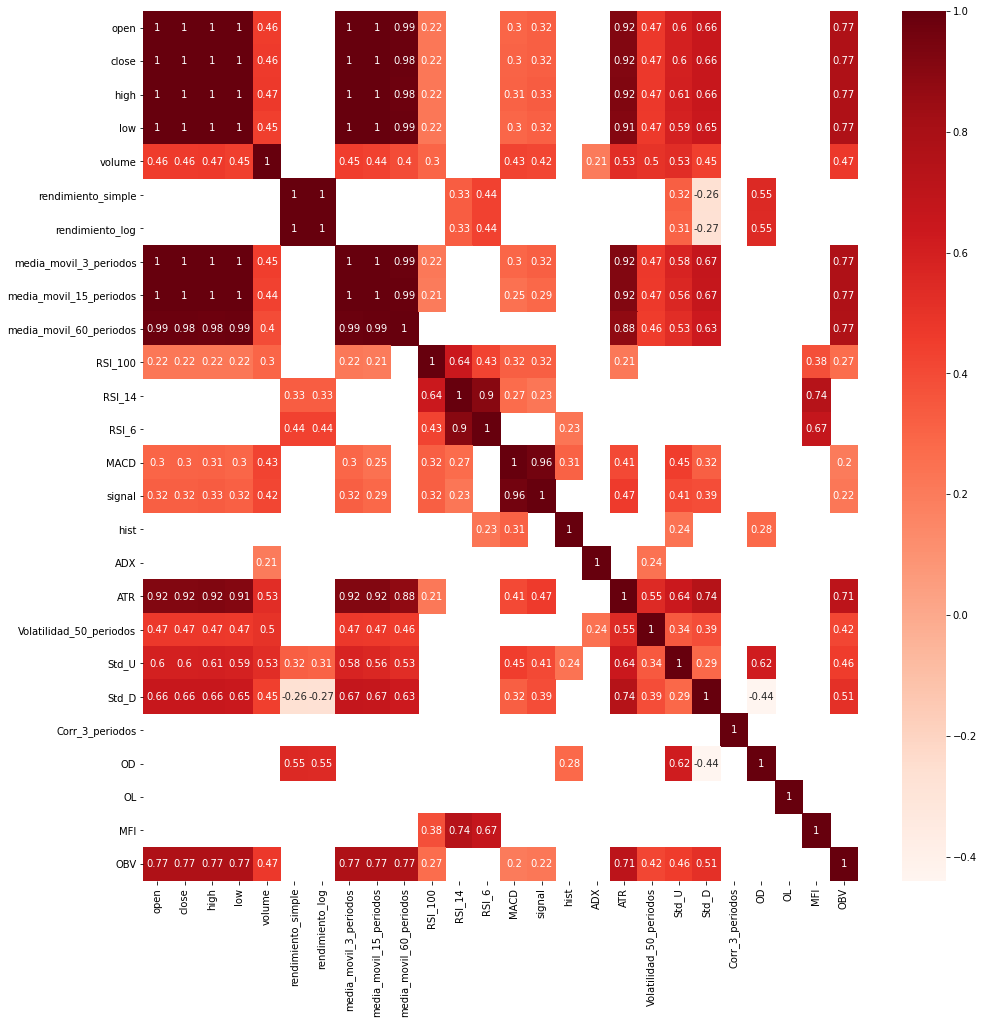

In [ ]:
#Estudiando correlaciones entre fetures de un activo
corre1 = df.loc[list_group1[0]].corr()

plt.figure(figsize=(16,16))

sns.heatmap(corre1[np.abs(corre1)>0.2], annot=True, cmap=plt.cm.Reds)
plt.show()



* Se observa alta correlación entre las medias moviles y los precios, bajando un poco la correlacion con la media movil a 60 periodos.
Tambien se ve correlacion entre el OD y los rendimientos.

* Se ve correlación entre STD_U y STD_D con los precios, los rendimientos, la volatilidad, MACD y signal y las medias moviles.

* Se ve algo de correlación entre la volatilidad y los precios y medias moviles

* Se ve una cierta correlación entre el RSI a 6 periodos y los rendimientos, tambien se ve correlación con los otros RSI

* Se ve algo de correlación entre ADX y el volumen

* Correlacion con la media movil y el OD, no dan correlacion con otror features

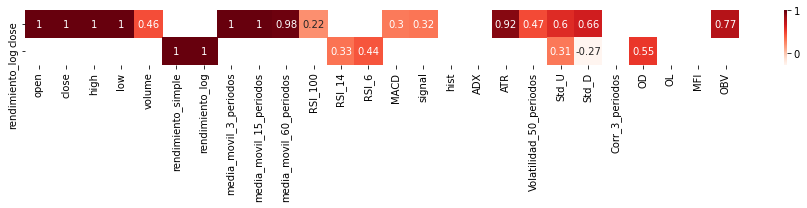

In [ ]:
interes=corre1.loc[['close','rendimiento_log'],:]
plt.figure(figsize=(16,1))

sns.heatmap(interes[np.abs(interes)>0.2], annot=True, cmap=plt.cm.Reds)
plt.show()

segundo dataframe

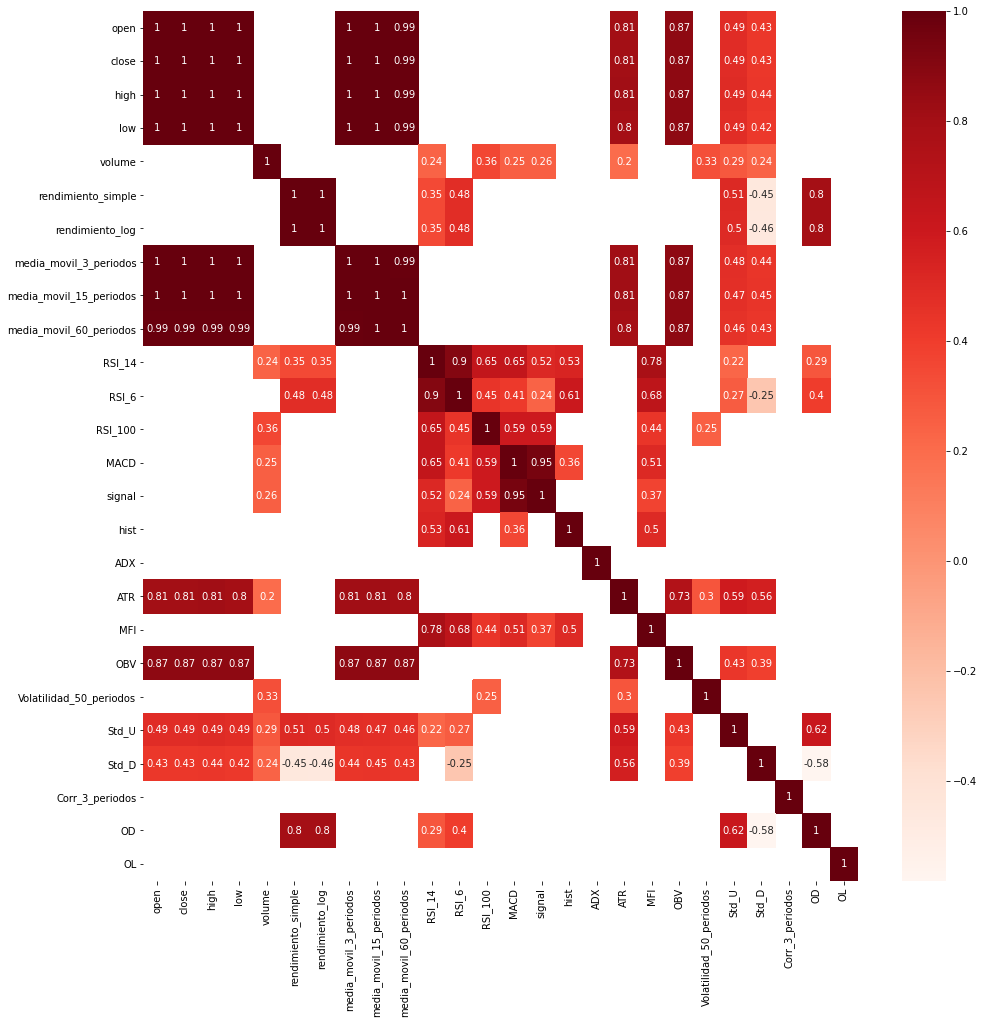

In [ ]:
#Estudiando correlaciones entre fetures de un activo
corre2 = df2.loc[list_group2[0]].corr()

plt.figure(figsize=(16,16))

sns.heatmap(corre2[np.abs(corre2)>.2], annot=True, cmap=plt.cm.Reds)
plt.show()



* Se observa alta correlación entre las medias moviles y los precios, bajando un poco la correlacion con la media movil a 60 periodos.
Tambien se ve correlacion entre el OD y los rendimientos.

* Se ve correlación entre STD_U y STD_D con los precios, los rendimientos, la volatilidad, MACD y signal, RSI de bajo n, las medias moviles y el OD

* No Se ve la poca correlación entre la volatilidad, los precios y medias moviles que habia en el otro activo. Si se ve algo de correlación con el volumen

* Se ve una cierta correlación entre el RSI a 6 periodos y los rendimientos, tambien se ve correlación con los otros RSI

* Se ve algo de correlación entre ADX y la volatilidad

* Correlacion con la media movil y el OL (opuesto al caso anterior), no dan correlacion con otror features

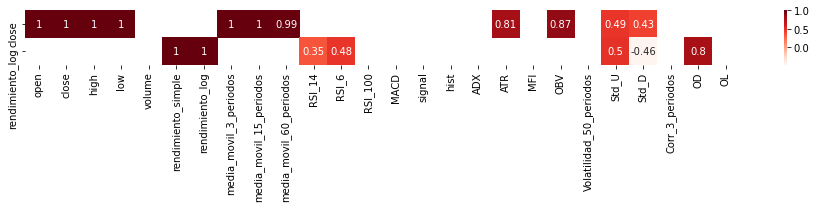

In [ ]:
interes=corre2.loc[['close','rendimiento_log'],:]
plt.figure(figsize=(16,1))

sns.heatmap(interes[np.abs(interes)>0.2], annot=True, cmap=plt.cm.Reds)
plt.show()